## **Stock Price Analysis: AMD & NVIDIA**
For this investigation, I chose **AMD and NVIDIA** because they are **two of the most influential semiconductor companies** in the market. Their stock prices are heavily impacted by **technological advancements, supply chain issues, and investor sentiment**. Additionally, these stocks generate **significant public discussion**, making them ideal for analyzing **how sentiment influences price movement**.

I retrieved historical stock prices for **AMD and NVIDIA from 2022 to 2025** using the Yahoo Finance API. By examining **closing prices, trends, correlations, and volatility**, I aim to understand **how these two stocks move together and how external events impact their performance**.

In [2]:
import yfinance as yf
import pandas as pd

# Defining stock symbols & date range
stocks = ["AMD", "NVDA"]
start_date = "2022-01-01"
end_date = "2025-03-09"

# Fetching data
data = {}
for stock in stocks:
    ticker = yf.Ticker(stock)
    df = ticker.history(start=start_date, end=end_date)
    data[stock] = df[['Open', 'Close']]

# Converting to df
amd_data = data["AMD"].reset_index()
nvda_data = data["NVDA"].reset_index()

# Displaying sample
print(amd_data.head())
print(nvda_data.head())

# Saving
save_path = "/tmp/"  # Or change to another writable directory

amd_data.to_csv(save_path + "AMD_stock_prices.csv", index=False)
nvda_data.to_csv(save_path + "NVDA_stock_prices.csv", index=False)

print(f"Saved files to: {save_path}")

                       Date        Open       Close
0 2022-01-03 00:00:00-05:00  145.139999  150.240005
1 2022-01-04 00:00:00-05:00  151.009995  144.419998
2 2022-01-05 00:00:00-05:00  142.820007  136.149994
3 2022-01-06 00:00:00-05:00  136.190002  136.229996
4 2022-01-07 00:00:00-05:00  136.279999  132.000000
                       Date       Open      Close
0 2022-01-03 00:00:00-05:00  29.765494  30.070986
1 2022-01-04 00:00:00-05:00  30.226728  29.241367
2 2022-01-05 00:00:00-05:00  28.900937  27.558170
3 2022-01-06 00:00:00-05:00  27.594107  28.131214
4 2022-01-07 00:00:00-05:00  28.094276  27.201759
Saved files to: /tmp/


In [7]:
# Loading data
amd_data = pd.read_csv("/tmp/AMD_stock_prices.csv", parse_dates=["Date"])
nvda_data = pd.read_csv("/tmp/NVDA_stock_prices.csv", parse_dates=["Date"])

# Merging for comparison
stock_data = pd.merge(amd_data, nvda_data, on="Date", suffixes=("_AMD", "_NVDA"))

print(stock_data.head())

                        Date    Open_AMD   Close_AMD  Open_NVDA  Close_NVDA
0  2022-01-03 00:00:00-05:00  145.139999  150.240005  29.765494   30.070986
1  2022-01-04 00:00:00-05:00  151.009995  144.419998  30.226728   29.241367
2  2022-01-05 00:00:00-05:00  142.820007  136.149994  28.900937   27.558170
3  2022-01-06 00:00:00-05:00  136.190002  136.229996  27.594107   28.131214
4  2022-01-07 00:00:00-05:00  136.279999  132.000000  28.094276   27.201759


Let's look at closing prices over time to show overall trends for AMD & NVIDIA prices. This will help identify correlated movements between the two stocks.

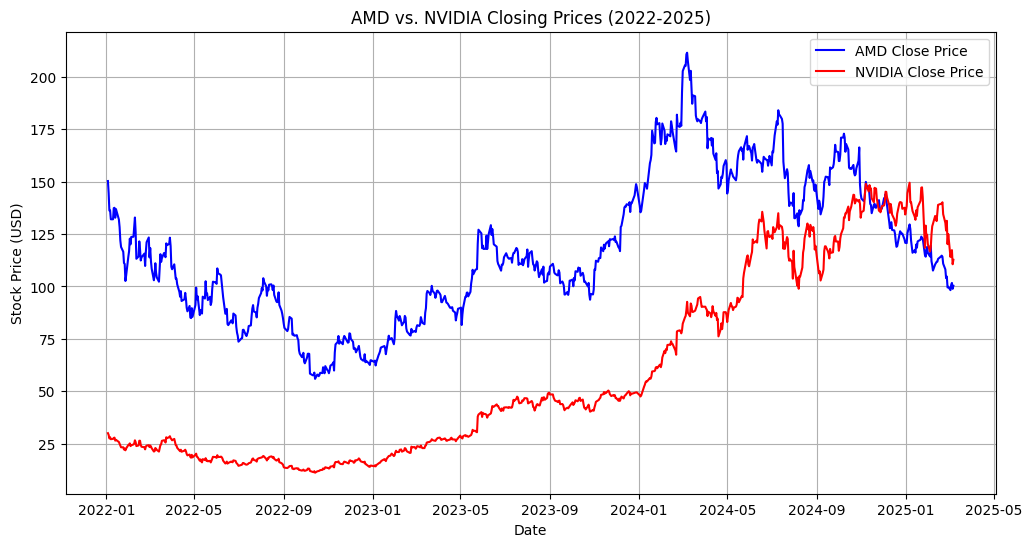

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x=stock_data["Date"], y=stock_data["Close_AMD"], label="AMD Close Price", color="blue")
sns.lineplot(x=stock_data["Date"], y=stock_data["Close_NVDA"], label="NVIDIA Close Price", color="red")

plt.title("AMD vs. NVIDIA Closing Prices (2022-2025)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

Let's smooth out short-term fluctuations by adding 30-day moving averages.

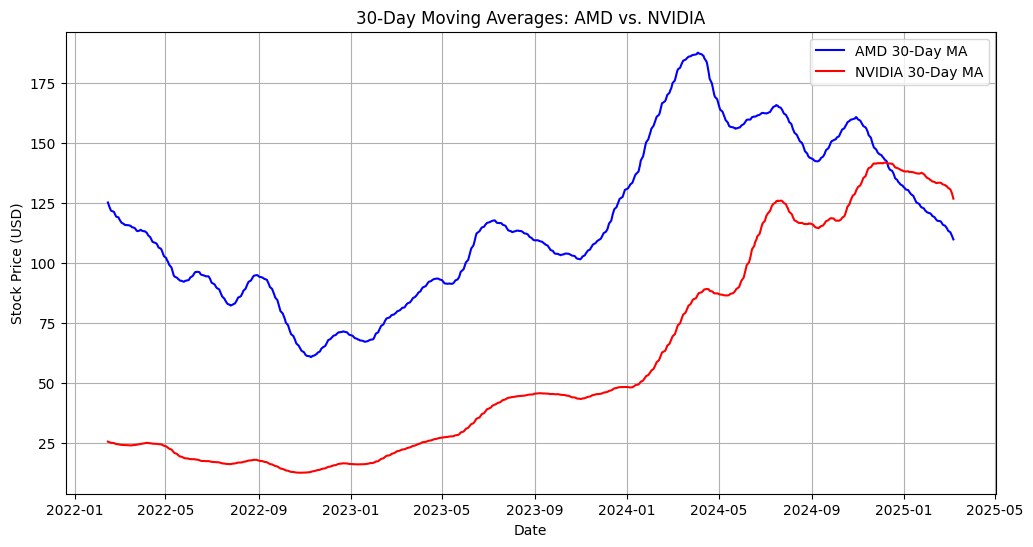

In [9]:
stock_data["AMD_MA30"] = stock_data["Close_AMD"].rolling(window=30).mean()
stock_data["NVDA_MA30"] = stock_data["Close_NVDA"].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=stock_data["Date"], y=stock_data["AMD_MA30"], label="AMD 30-Day MA", color="blue")
sns.lineplot(x=stock_data["Date"], y=stock_data["NVDA_MA30"], label="NVIDIA 30-Day MA", color="red")

plt.title("30-Day Moving Averages: AMD vs. NVIDIA")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

Let's measure correlation between AMD and NVIDIA stock prices.

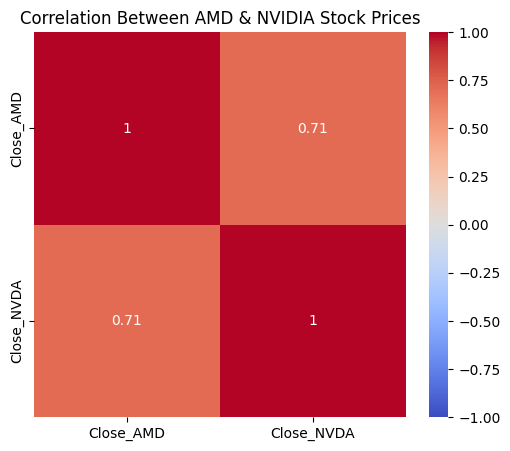

In [10]:
import numpy as np

# Compute correlation matrix
correlation_matrix = stock_data[["Close_AMD", "Close_NVDA"]].corr()

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

plt.title("Correlation Between AMD & NVIDIA Stock Prices")
plt.show()

Let's visualize the scatter plot to help visualize if AMD & NVIDIA prices move in sync.

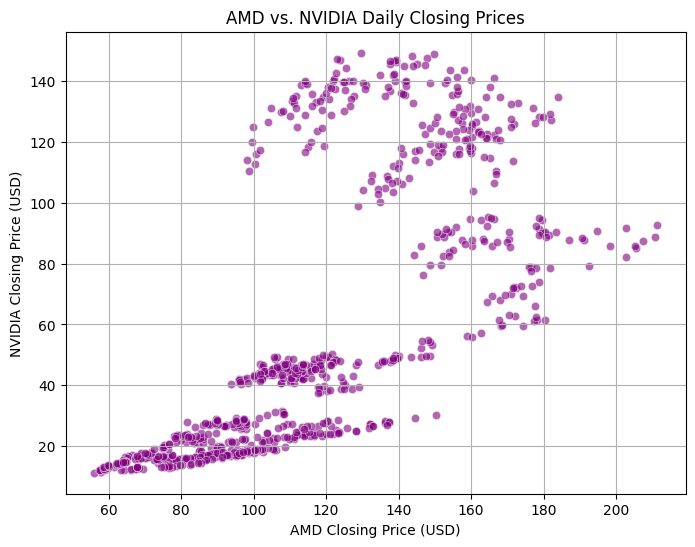

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=stock_data["Close_AMD"], y=stock_data["Close_NVDA"], alpha=0.6, color="purple")

plt.title("AMD vs. NVIDIA Daily Closing Prices")
plt.xlabel("AMD Closing Price (USD)")
plt.ylabel("NVIDIA Closing Price (USD)")
plt.grid(True)
plt.show()

Let's compare daily price fluctuations for AMD & NVIDIA.

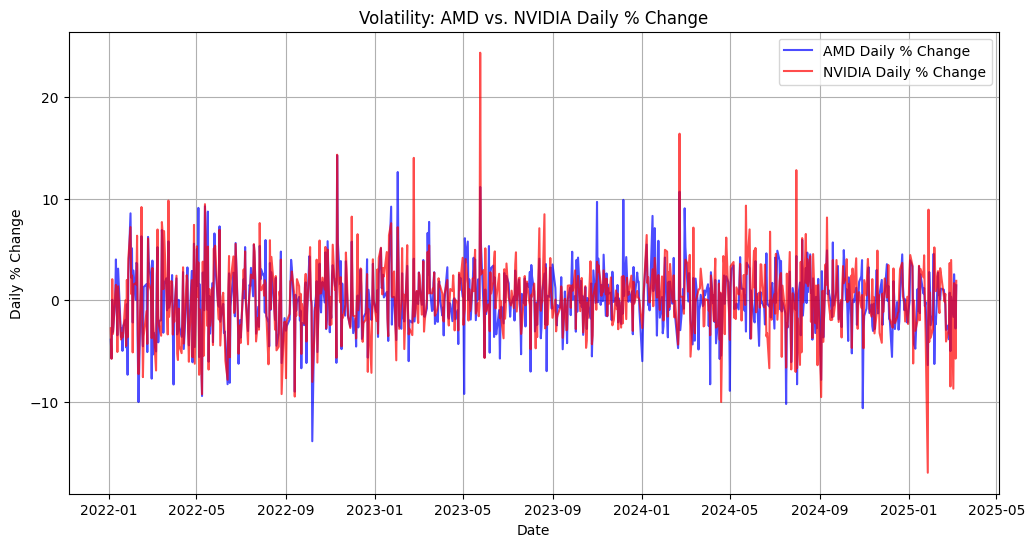

In [12]:
stock_data["AMD_Daily_Change"] = stock_data["Close_AMD"].pct_change() * 100
stock_data["NVDA_Daily_Change"] = stock_data["Close_NVDA"].pct_change() * 100

plt.figure(figsize=(12, 6))
sns.lineplot(x=stock_data["Date"], y=stock_data["AMD_Daily_Change"], label="AMD Daily % Change", color="blue", alpha=0.7)
sns.lineplot(x=stock_data["Date"], y=stock_data["NVDA_Daily_Change"], label="NVIDIA Daily % Change", color="red", alpha=0.7)

plt.title("Volatility: AMD vs. NVIDIA Daily % Change")
plt.xlabel("Date")
plt.ylabel("Daily % Change")
plt.legend()
plt.grid(True)
plt.show()

## **Twitter Sentiment Analysis & API Limitations**
To analyze **public sentiment**, I attempted to fetch real-time tweets mentioning "AMD stock" and "NVIDIA stock" using the **Twitter API (X API)**. The goal was to **correlate social sentiment with stock price movements**—for example, seeing if a surge in negative tweets preceded a price drop.

However, the **Twitter API's strict rate limits (429 Too Many Requests error)** have made it difficult to retrieve enough meaningful data. The free-tier API only allows access to a **small number of recent tweets**, and historical tweet data is **restricted to paid or academic research tiers**. Due to these constraints, alternative data sources or synthetic sentiment modeling may be needed to complete the analysis.

In [5]:
import tweepy
import pandas as pd
import time

# Twitter API v2 authentication (Use your Bearer Token)
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAANJPzwEAAAAAHpbaMHvXnP9QojUvdcnf7%2BKFCAI%3DXLxJ2wv3pMaID7s7lmG6jNVeui0HH66wNXRDb7rWOajI7oqrwb"

# Authenticate with Tweepy Client (API v2)
client = tweepy.Client(bearer_token=BEARER_TOKEN, wait_on_rate_limit=True)

# Function to fetch tweets with automatic rate limit handling
def fetch_tweets(query, num_tweets=100):
    tweets = []
    try:
        response = client.search_recent_tweets(query=query, max_results=min(num_tweets, 100), tweet_fields=["created_at", "text"])
        
        if response.data:
            for tweet in response.data:
                tweets.append([tweet.created_at, tweet.text])
                
    except tweepy.TooManyRequests:
        print("Rate limit reached. Sleeping for 15 minutes...")
        time.sleep(900)  # Sleep for 15 minutes before retrying
        return fetch_tweets(query, num_tweets)

    return pd.DataFrame(tweets, columns=["date", "tweet"])

# Fetch tweets for AMD & NVIDIA
amd_tweets = fetch_tweets("AMD stock", num_tweets=100)
nvda_tweets = fetch_tweets("NVIDIA stock", num_tweets=100)

# Save tweets
amd_tweets.to_csv("AMD_tweets.csv", index=False)
nvda_tweets.to_csv("NVDA_tweets.csv", index=False)

print("Fetched tweets and saved!")

Rate limit exceeded. Sleeping for 836 seconds.


KeyboardInterrupt: 

### Attempt 2: Sentiment Analysis with Reddit 

In [14]:
pip install praw

  Using cached websocket_client-1.8.0-py3-none-any.whl.metadata (8.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 2.8 MB/s eta 0:00:00a 0:00:01
Using cached websocket_client-1.8.0-py3-none-any.whl (58 kB)

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
import praw

# Reddit API credentials
reddit = praw.Reddit(
    client_id="Own-Assumption6451",
    client_secret="	QNnHoADrKpnWW1NF4WWPTT8-KZzAbQ",
    user_agent="stocksentiment"
)

# Search for recent discussions about AMD
subreddit = reddit.subreddit("stocks")
for post in subreddit.search("AMD stock", limit=10):
    print(post.title)

ResponseException: received 401 HTTP response